In [1]:
# Load library
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

%matplotlib notebook

In [10]:
# Define Super Parameter
epochs = 10
epochs_comment = 10
batch_size = 32
batch_size_comment = 16

In [3]:
# Load Data and Explore
df=pd.read_csv("GME_Stock_History.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (4778, 8)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2/4/2021,91.190000,91.500000,53.33,53.50,61903600,0.0,0
1,2/3/2021,112.010000,113.400000,85.25,92.41,42698500,0.0,0
2,2/2/2021,140.760000,158.000000,74.22,90.00,78183100,0.0,0
3,2/1/2021,316.560000,322.000000,212.00,225.00,36655400,0.0,0
4,1/29/2021,379.709992,413.980011,250.00,325.00,50397132,0.0,0


In [4]:
# Convert Date column into datetime
df['Date'] = pd.to_datetime(df['Date'])

df.drop(['Dividends','Stock Splits'],axis=1, inplace=True)
df=df.sort_values(by='Date')
df.set_index('Date')

,Open,High,Low,Close,Volume
Date,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200
...,...,...,...,...,...
2021-01-29,379.709992,413.980011,250.000000,325.000000,50397132
2021-02-01,316.560000,322.000000,212.000000,225.000000,36655400
2021-02-02,140.760000,158.000000,74.220000,90.000000,78183100


In [5]:
# Split Dataset
training_set = df.iloc[:3643, 1:2].values
test_set = df.iloc[3643:, 1:2].values

In [6]:
# normalize the data
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set

array([[ 6.48051327],
       [ 6.85083082],
       [ 6.73300071],
       ...,
       [24.71311351],
       [24.49168445],
       [24.16744933]])

In [8]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 3643):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [9]:
# Build the model, use the MSE loss function and the Adam stochastic gradient descent optimizer
model_1 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True, input_shape =(X_train.shape[1], 1)))
model_1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50))
model_1.add(Dropout(0.2))

# Adding the output layer
model_1.add(Dense(units = 1))

# Compiling the RNN
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

from datetime import datetime as dt
start = dt.now()

# Fitting the RNN to the Training set
model_1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/10
112/112 [==============================] - 16s 66ms/step - loss: 0.0221
Epoch 2/10
112/112 [==============================] - 8s 70ms/step - loss: 0.0043
Epoch 3/10
112/112 [==============================] - 8s 70ms/step - loss: 0.0038
Epoch 4/10
112/112 [==============================] - 8s 70ms/step - loss: 0.0030
Epoch 5/10
112/112 [==============================] - 8s 74ms/step - loss: 0.0031
Epoch 6/10
112/112 [==============================] - 8s 72ms/step - loss: 0.0027
Epoch 7/10
112/112 [==============================] - 8s 71ms/step - loss: 0.0025
Epoch 8/10
112/112 [==============================] - 8s 72ms/step - loss: 0.0024
Epoch 9/10
112/112 [==============================] - 8s 72ms/step - loss: 0.0025
Epoch 10/10
112/112 [==============================] - 8s 72ms/step - loss: 0.0022


In [11]:
# Calculate the model training duration
running_secs = (dt.now() - start).seconds
print('Model_1 cost {} seconds' .format(running_secs))

Model_1 cost 142 seconds


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [13]:
# Getting the predicted stock price
dataset_train = df.iloc[:3643, 1:2]
dataset_test = df.iloc[3643:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1195):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1135, 60, 1)


In [14]:
# Make predictions
predicted_stock_price = model_1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<IPython.core.display.Javascript object>


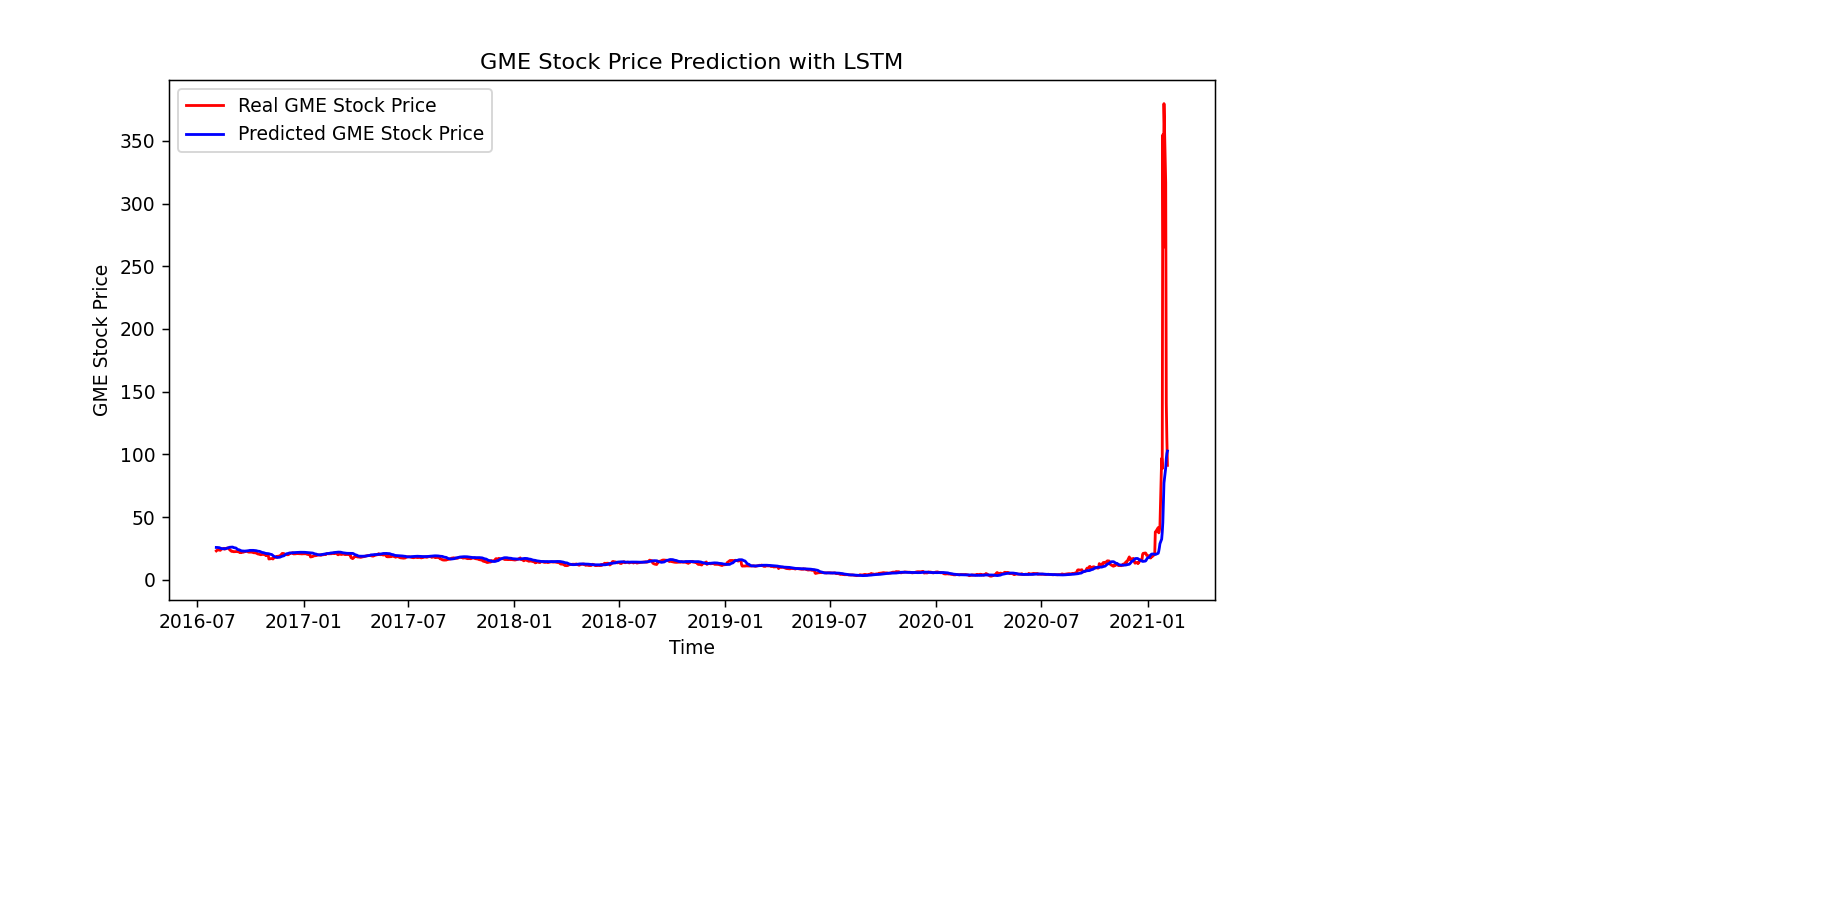

In [15]:
# Visualising the results
fig = plt.figure(figsize=(10,5))
plt.title('GME Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('GME Stock Price')


plt.plot(df.loc[1134:, 'Date'],dataset_test.values, color = 'red',label = 'Real GME Stock Price')
plt.plot(df.loc[1134:, 'Date'],predicted_stock_price, color = 'blue',label = 'Predicted GME Stock Price')
#plt.plot(dataset_test.values, color = 'red',label = 'Real GME Stock Price')
#plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted GME Stock Price')

plt.legend()

plt.show()

In [16]:
# Calculate the prediction metrics: MSE, RMSE 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

metrics = {}
metrics['model_1 MSE'] = mean_squared_error(dataset_test.values, predicted_stock_price)
metrics['model_1 MAE'] = mean_absolute_error(dataset_test.values, predicted_stock_price)
metrics['model_1 RMSE'] = math.sqrt(mean_squared_error(dataset_test.values, predicted_stock_price))
metrics

{'model_1 MSE': 258.15357930768306,
 'model_1 MAE': 2.0647449312657575,
 'model_1 RMSE': 16.067158407997447}

In [17]:
# Change Super parameter
# Build the model, use the MSE loss function and the Adam stochastic gradient descent optimizer
model_2 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_2.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape =(X_train.shape[1], 1))))
model_2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_2.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model_2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_2.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model_2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_2.add(Bidirectional(LSTM(units = 50)))
model_2.add(Dropout(0.2))

# Adding the output layer
model_2.add(Dense(units = 1))

# Compiling the RNN
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

from datetime import datetime as dt
start = dt.now()

# Fitting the RNN to the Training set
model_2.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/10
112/112 [==============================] - 30s 82ms/step - loss: 0.0177
Epoch 2/10
112/112 [==============================] - 9s 83ms/step - loss: 0.0031
Epoch 3/10
112/112 [==============================] - 10s 85ms/step - loss: 0.0022
Epoch 4/10
112/112 [==============================] - 9s 85ms/step - loss: 0.0018
Epoch 5/10
112/112 [==============================] - 9s 85ms/step - loss: 0.0018
Epoch 6/10
112/112 [==============================] - 10s 91ms/step - loss: 0.0017
Epoch 7/10
112/112 [==============================] - 11s 95ms/step - loss: 0.0015
Epoch 8/10
112/112 [==============================] - 10s 94ms/step - loss: 0.0015
Epoch 9/10
112/112 [==============================] - 11s 95ms/step - loss: 0.0015
Epoch 10/10
112/112 [==============================] - 10s 93ms/step - loss: 0.0013


In [18]:
# Calculate the model training duration
running_secs = (dt.now() - start).seconds
print('Model_2 cost {} seconds' .format(running_secs))

Model_2 cost 122 seconds


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 60, 100)           20800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 100)           60400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 100)           60400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)              

In [20]:
# Make predictions
predicted_stock_price = model_2.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<IPython.core.display.Javascript object>


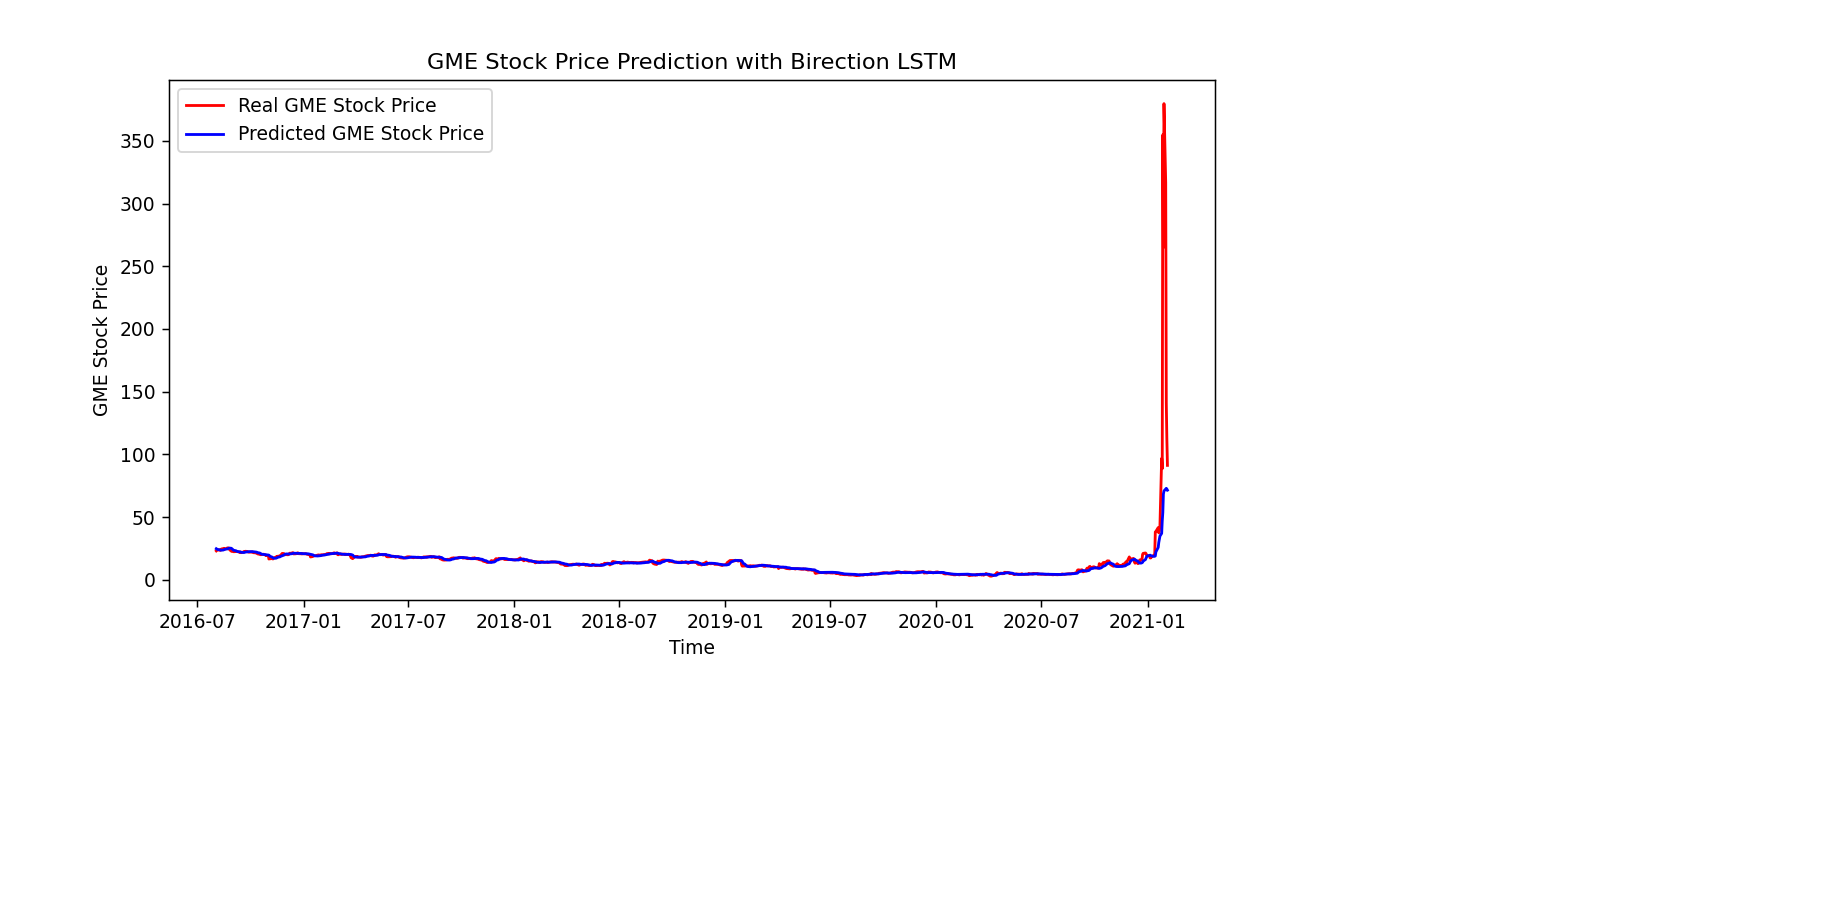

In [21]:
# Visualising the results
fig = plt.figure(figsize=(10,5))
plt.title('GME Stock Price Prediction with Birection LSTM')
plt.xlabel('Time')
plt.ylabel('GME Stock Price')


plt.plot(df.loc[1134:, 'Date'],dataset_test.values, color = 'red',label = 'Real GME Stock Price')
plt.plot(df.loc[1134:, 'Date'],predicted_stock_price, color = 'blue',label = 'Predicted GME Stock Price')

plt.legend()

plt.show()

In [22]:
# Calculate the prediction metrics: MSE, RMSE 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

metrics['model_2 MSE'] = mean_squared_error(dataset_test.values, predicted_stock_price)
metrics['model_2 MAE'] = mean_absolute_error(dataset_test.values, predicted_stock_price)
metrics['model_2 RMSE'] = math.sqrt(mean_squared_error(dataset_test.values, predicted_stock_price))
metrics

{'model_1 MSE': 258.15357930768306,
 'model_1 MAE': 2.0647449312657575,
 'model_1 RMSE': 16.067158407997447,
 'model_2 MSE': 262.7874361742945,
 'model_2 MAE': 1.755048948071698,
 'model_2 RMSE': 16.210719791986243}

In [23]:
# Text Analysis with TextBlob

import pandas as pd

df_reddit = pd.read_csv('r_wallstreetbets_posts.csv')

from datetime import datetime
df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')

# Get Sentimental through TextBlob
from textblob import TextBlob
sentiment_list = []
for i in range(len(df_reddit['title'])):
    sentiment = TextBlob(str(df_reddit['title'][i])).sentiment.polarity
    sentiment_list.append(sentiment)

df_reddit['cat_TextBlob'] = sentiment_list

reduced_df = df_reddit[['title','date','created_utc','cat_TextBlob']]

reduced_df['date'] = df_reddit['date'].dt.strftime("%#m/%#d/%Y")

# Combine with Stock price Dataset
reduced_df = reduced_df.groupby(['date'])['cat_TextBlob'].agg(['sum','mean'])

stock_df = pd.read_csv('GME_Stock_History.csv')

df = pd.merge(left = stock_df,right = reduced_df,how='inner',left_on='Date',right_on='date')

print("Number of rows and columns:", df.shape)
df.head(5)

C:\Users\txsha\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Number of rows and columns: (2136, 10)


<ipython-input-23-bb469575bd20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['date'] = df_reddit['date'].dt.strftime("%#m/%#d/%Y")


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sum,mean
0,1/29/2021,379.709992,413.980011,250.000000,325.000000,50397132,0.0,0,2027.146910,0.023918
1,1/28/2021,265.000000,483.000000,112.250000,193.600006,58815800,0.0,0,2396.596910,0.019812
2,1/27/2021,354.829987,380.000000,249.000000,347.510010,93396700,0.0,0,614.683747,0.019059
3,1/26/2021,88.559998,150.000000,80.199997,147.979996,178588000,0.0,0,128.571322,0.020008
4,1/25/2021,96.730003,159.179993,61.130001,76.790001,177874000,0.0,0,86.881322,0.008147


In [24]:
# Convert Date column into datetime
df['Date'] = pd.to_datetime(df['Date'])

df.drop(['Dividends','Stock Splits'],axis=1, inplace=True)
df=df.sort_values(by='Date')
df.set_index('Date')

,Open,High,Low,Close,Volume,sum,mean
Date,,,,,,,
2012-04-11,14.449782,14.585334,14.192235,14.415895,4890500,0.000000,0.000000
2012-04-12,14.436226,14.714106,14.402339,14.612443,2103700,0.050000,0.050000
2012-04-16,14.436226,14.781882,14.212566,14.707330,3427500,-0.400000,-0.400000
2012-04-17,14.788663,15.046211,14.775107,15.012322,4005600,0.000000,0.000000
2012-04-19,15.080096,15.276647,14.998765,15.107207,3532100,0.125000,0.062500
...,...,...,...,...,...,...,...
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,86.881322,0.008147
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,128.571322,0.020008
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,614.683747,0.019059


In [25]:
df

,Date,Open,High,Low,Close,Volume,sum,mean
2135,2012-04-11,14.449782,14.585334,14.192235,14.415895,4890500,0.000000,0.000000
2134,2012-04-12,14.436226,14.714106,14.402339,14.612443,2103700,0.050000,0.050000
2133,2012-04-16,14.436226,14.781882,14.212566,14.707330,3427500,-0.400000,-0.400000
2132,2012-04-17,14.788663,15.046211,14.775107,15.012322,4005600,0.000000,0.000000
2131,2012-04-19,15.080096,15.276647,14.998765,15.107207,3532100,0.125000,0.062500
...,...,...,...,...,...,...,...,...
4,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,86.881322,0.008147
3,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,128.571322,0.020008
2,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,614.683747,0.019059
1,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,2396.596910,0.019812


In [26]:
# Split Dataset, Review comemnts data between 1/31/2021 ~ 4/11/2012, Stock price 2/4/2021 ~ 2/13/2002
#training_set = df.iloc[:1680, 1:2].values
#test_set = df.iloc[1680:, 1:2].values
training_set = df.loc[:1680, ['mean', 'Open']].values
test_set = df.loc[1680:, ['mean', 'Open']].values

In [27]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

sc_feature = MinMaxScaler(feature_range = (0, 1))
sc_output = MinMaxScaler(feature_range = (0, 1))

training_set_feature = sc_feature.fit_transform(training_set[:, 0].reshape(-1, 1))
testing_set_feature = sc_feature.transform(test_set[:, 0].reshape(-1, 1))

training_set_output = sc_output.fit_transform(training_set[:, 1].reshape(-1, 1))
testing_set_output = sc_output.transform(test_set[:, 1].reshape(-1, 1))

In [28]:
# Creating a data structure with 60 time-steps and 1 output
import numpy as np

X_train = []
y_train = []

X_test = []
y_test = []

for i in range(60, 456):
    X_train.append(training_set_feature[i-60:i, 0])
    y_train.append(training_set_output[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

for i in range(60, testing_set_feature.shape[0]):
    X_test.append(testing_set_feature[i-60:i, 0])
    y_test.append(testing_set_output[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [29]:
# Build the model, use the MSE loss function and the Adam stochastic gradient descent optimizer
model_3 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True, input_shape =(X_train.shape[1], 1)))
model_3.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50))
model_3.add(Dropout(0.2))

# Adding the output layer
model_3.add(Dense(units = 1))

# Compiling the RNN
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

from datetime import datetime as dt
start = dt.now()

# Fitting the RNN to the Training set
model_3.fit(X_train, y_train, epochs = epochs_comment, batch_size = batch_size_comment)

Epoch 1/10
25/25 [==============================] - 11s 56ms/step - loss: 0.1354
Epoch 2/10
25/25 [==============================] - 1s 58ms/step - loss: 0.0809
Epoch 3/10
25/25 [==============================] - 2s 61ms/step - loss: 0.0854
Epoch 4/10
25/25 [==============================] - 2s 64ms/step - loss: 0.0825
Epoch 5/10
25/25 [==============================] - 2s 63ms/step - loss: 0.0825
Epoch 6/10
25/25 [==============================] - 1s 59ms/step - loss: 0.0779: 
Epoch 7/10
25/25 [==============================] - 1s 55ms/step - loss: 0.0806
Epoch 8/10
25/25 [==============================] - 1s 56ms/step - loss: 0.0823
Epoch 9/10
25/25 [==============================] - 2s 62ms/step - loss: 0.0832
Epoch 10/10
25/25 [==============================] - 2s 61ms/step - loss: 0.0846


In [30]:
# Calculate the model training duration
running_secs = (dt.now() - start).seconds
print('Model_3 cost {} seconds' .format(running_secs))

Model_3 cost 127 seconds


In [31]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [32]:
# Make predictions
predicted_stock_price = model_3.predict(X_test)
#print(predicted_stock_price.shape)
predicted_stock_price = sc_output.inverse_transform(predicted_stock_price)
dataset_test = sc_output.inverse_transform(np.array(y_test).reshape(-1, 1))

<IPython.core.display.Javascript object>


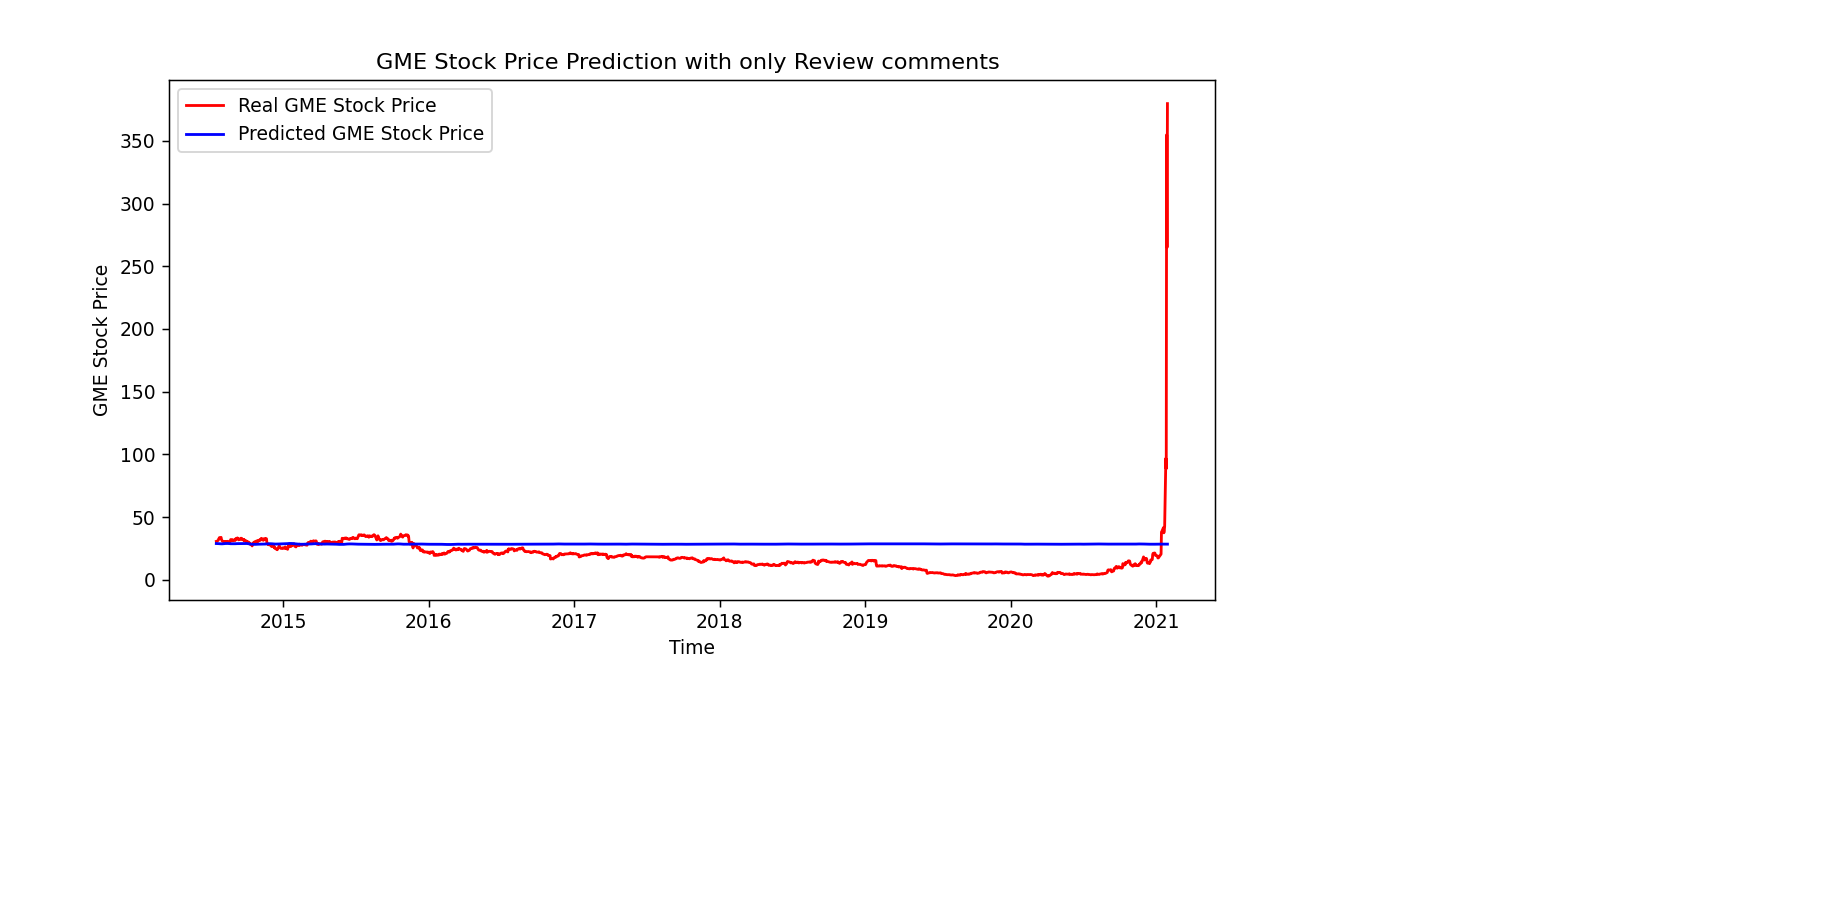

In [33]:
# Visualising the results
fig = plt.figure(figsize=(10,5))
plt.title('GME Stock Price Prediction with only Review comments ')
plt.xlabel('Time')
plt.ylabel('GME Stock Price')


plt.plot(df.loc[1620:, 'Date'],dataset_test, color = 'red',label = 'Real GME Stock Price')
plt.plot(df.loc[1620:, 'Date'],predicted_stock_price, color = 'blue',label = 'Predicted GME Stock Price')
#plt.plot(dataset_test.values, color = 'red',label = 'Real GME Stock Price')
#plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted GME Stock Price')

plt.legend()

plt.show()

In [34]:
# Calculate the prediction metrics: MSE, RMSE 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

metrics['model_3 MSE'] = mean_squared_error(dataset_test, predicted_stock_price)
metrics['model_3 MAE'] = mean_absolute_error(dataset_test, predicted_stock_price)
metrics['model_3 RMSE'] = math.sqrt(mean_squared_error(dataset_test, predicted_stock_price))
metrics

{'model_1 MSE': 258.15357930768306,
 'model_1 MAE': 2.0647449312657575,
 'model_1 RMSE': 16.067158407997447,
 'model_2 MSE': 262.7874361742945,
 'model_2 MAE': 1.755048948071698,
 'model_2 RMSE': 16.210719791986243,
 'model_3 MSE': 386.04997442486206,
 'model_3 MAE': 12.760344909621544,
 'model_3 RMSE': 19.648154478852767}

In [35]:
# Use Bidirectional LSTM to model
# Build the model, use the MSE loss function and the Adam stochastic gradient descent optimizer
model_4 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_4.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape =(X_train.shape[1], 1))))
model_4.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_4.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model_4.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_4.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model_4.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_4.add(Bidirectional(LSTM(units = 50)))
model_4.add(Dropout(0.2))

# Adding the output layer
model_4.add(Dense(units = 1))

# Compiling the RNN
model_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

from datetime import datetime as dt
start = dt.now()

# Fitting the RNN to the Training set
model_4.fit(X_train, y_train, epochs = epochs_comment, batch_size = batch_size_comment)

Epoch 1/10
25/25 [==============================] - 23s 71ms/step - loss: 0.1364
Epoch 2/10
25/25 [==============================] - 2s 72ms/step - loss: 0.0893
Epoch 3/10
25/25 [==============================] - 2s 71ms/step - loss: 0.0862
Epoch 4/10
25/25 [==============================] - 2s 71ms/step - loss: 0.0867
Epoch 5/10
25/25 [==============================] - 2s 71ms/step - loss: 0.0839
Epoch 6/10
25/25 [==============================] - 2s 72ms/step - loss: 0.0848
Epoch 7/10
25/25 [==============================] - 2s 72ms/step - loss: 0.0766
Epoch 8/10
25/25 [==============================] - 2s 72ms/step - loss: 0.0778
Epoch 9/10
25/25 [==============================] - 2s 72ms/step - loss: 0.0815
Epoch 10/10
25/25 [==============================] - 2s 72ms/step - loss: 0.0783


In [36]:
# Calculate the model training duration
running_secs = (dt.now() - start).seconds
print('Model_4 cost {} seconds' .format(running_secs))

Model_4 cost 148 seconds


In [37]:
# Make predictions
predicted_stock_price = model_4.predict(X_test)
#print(predicted_stock_price.shape)
predicted_stock_price = sc_output.inverse_transform(predicted_stock_price)
dataset_test = sc_output.inverse_transform(np.array(y_test).reshape(-1, 1))

<IPython.core.display.Javascript object>


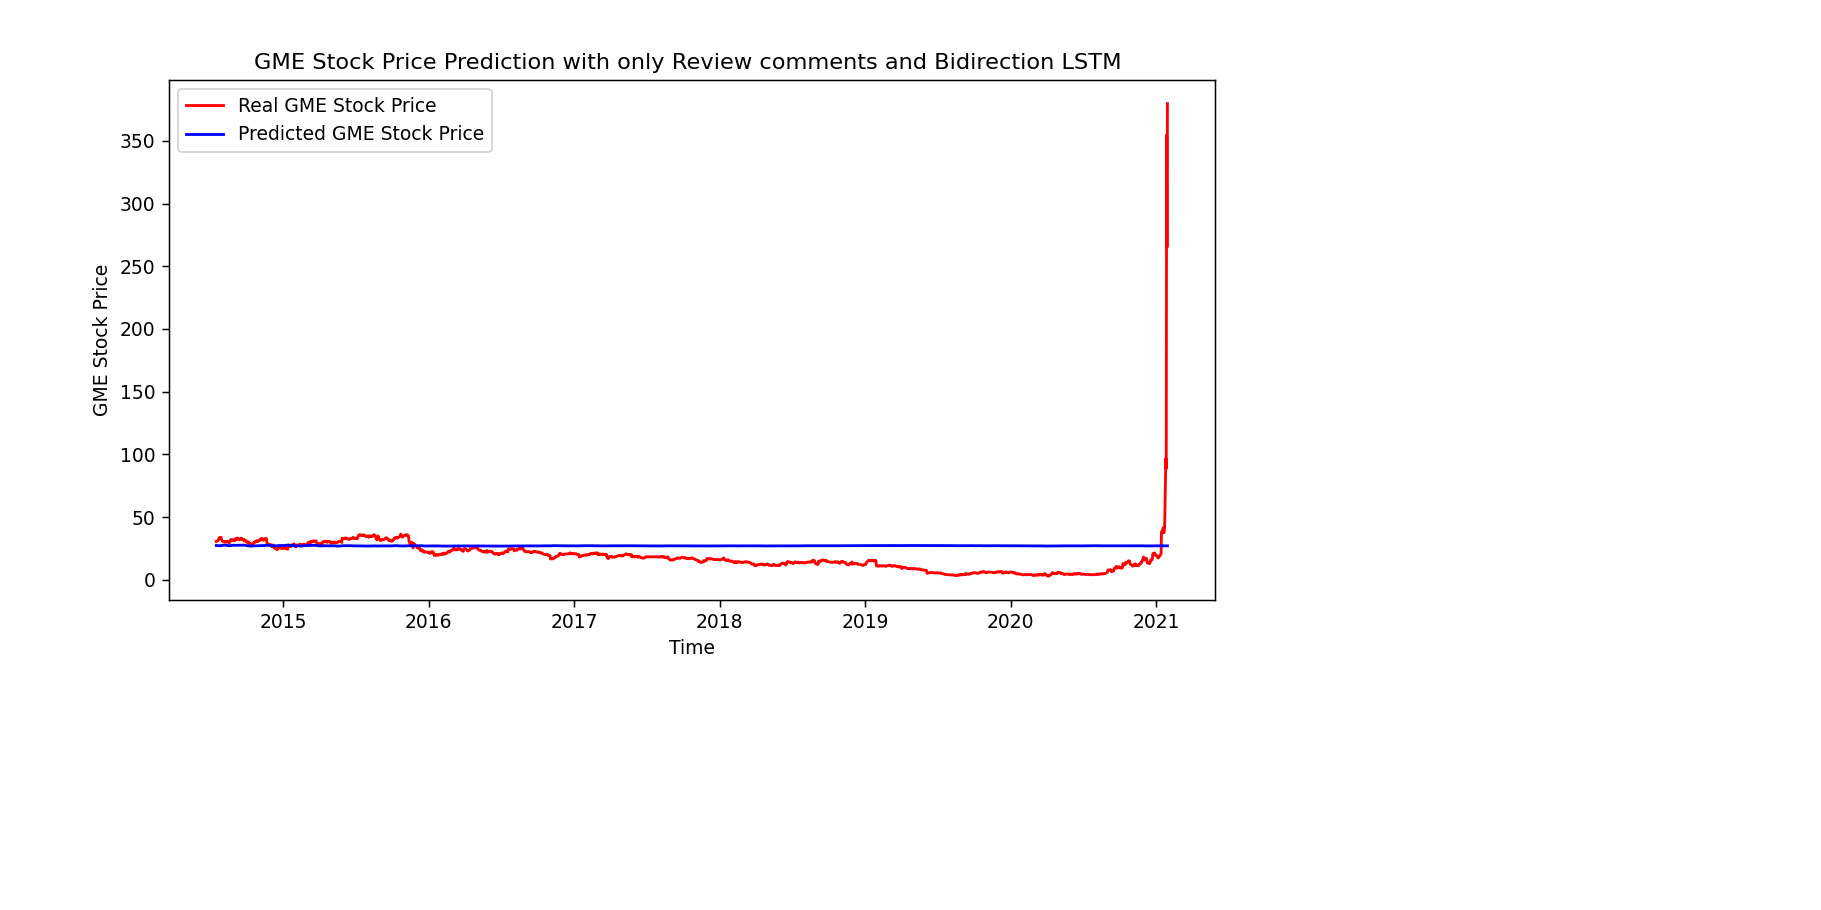

In [38]:
# Visualising the results
fig = plt.figure(figsize=(10,5))
plt.title('GME Stock Price Prediction with only Review comments and Bidirection LSTM ')
plt.xlabel('Time')
plt.ylabel('GME Stock Price')

plt.plot(df.loc[1620:, 'Date'],dataset_test, color = 'red',label = 'Real GME Stock Price')
plt.plot(df.loc[1620:, 'Date'],predicted_stock_price, color = 'blue',label = 'Predicted GME Stock Price')

plt.legend()

plt.show()

In [39]:
# Calculate the prediction metrics: MSE, RMSE 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

metrics['model_4 MSE'] = mean_squared_error(dataset_test, predicted_stock_price)
metrics['model_4 MAE'] = mean_absolute_error(dataset_test, predicted_stock_price)
metrics['model_4 RMSE'] = math.sqrt(mean_squared_error(dataset_test, predicted_stock_price))
metrics


{'model_1 MSE': 258.15357930768306,
 'model_1 MAE': 2.0647449312657575,
 'model_1 RMSE': 16.067158407997447,
 'model_2 MSE': 262.7874361742945,
 'model_2 MAE': 1.755048948071698,
 'model_2 RMSE': 16.210719791986243,
 'model_3 MSE': 386.04997442486206,
 'model_3 MAE': 12.760344909621544,
 'model_3 RMSE': 19.648154478852767,
 'model_4 MSE': 360.2237562522712,
 'model_4 MAE': 11.910528272030655,
 'model_4 RMSE': 18.979561540042784}